# The Sparks Foundation GRIP Task-2

## Prediction Using Unsupervised Machine Learning

##### Author - Prabhat Kumar

###### Objective - Predict the optimum number of clusters from the given 'Iris' dataset and represent it visually.



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
df = pd.read_csv("iris.csv",sep=",")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Counting each species present in the dataset
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Modelling
# Rescaling the Data

In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_column = scaler.fit_transform(df.drop(['Id','Species'],axis=1))
scaled_column.shape

(150, 4)

# Finding Optimal Number of Clusters

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

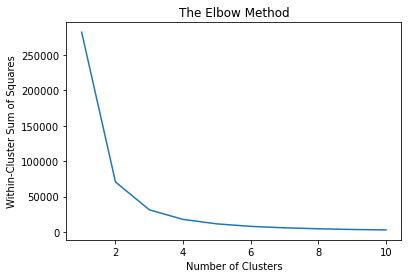

In [10]:
# The Elbow Curve
x = df.iloc[:,[0, 1, 2, 3]].values
wcss= []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [11]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_column)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(scaled_column, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.38911531839663555
For n_clusters=5, the silhouette score is 0.34770687913996523
For n_clusters=6, the silhouette score is 0.34152832231465285
For n_clusters=7, the silhouette score is 0.3260585756923267
For n_clusters=8, the silhouette score is 0.33440176370870583


From both the analysis we can choose the number of clusters as 3.

# Hierarchical Clustering

# Reconfirming the number of clusters

In [12]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

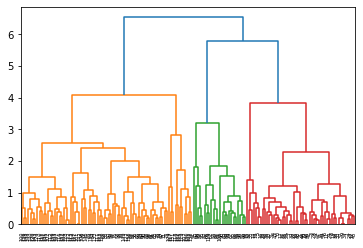

In [13]:
mergin = linkage(scaled_column, method='complete', metric='euclidean')
dendrogram(mergin)
plt.show()

Now this dendrogram clearly indicates that there are 3 distinct set of clusters.

In [14]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(scaled_column)
y_kmeans_predict = y_kmeans.predict(scaled_column)
y_kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
centers = kmeans.cluster_centers_

# Visualising the Clusters

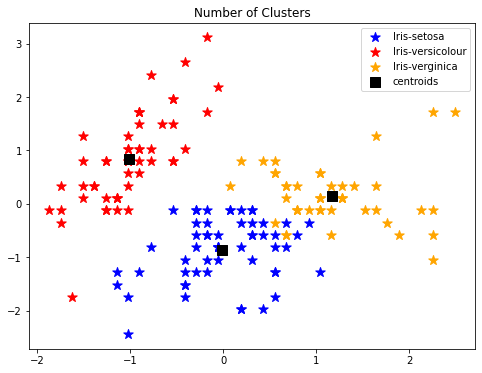

In [16]:
# Representing the Clusters for Visualisation
plt.figure(figsize=(8,6))
plt.scatter(scaled_column[y_kmeans_predict ==0,0], scaled_column[y_kmeans_predict ==0,1], s=100, marker='*', c='blue', 
label='Iris-setosa')
plt.scatter(scaled_column[y_kmeans_predict ==1,0], scaled_column[y_kmeans_predict ==1,1], s=100, marker='*', c='red',
label = 'Iris-versicolour')    
plt.scatter(scaled_column[y_kmeans_predict ==2,0], scaled_column[y_kmeans_predict ==2,1], s=100, marker='*', c='orange',
label = 'Iris-verginica')  
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker=',', c='black', label= 'centroids')
plt.title('Number of Clusters')
plt.legend()
plt.show()

# CONCLUSION

The optimal number of clusters for this data is 3.